Overveiw:
In this problem we are given the brightness of a star normalized around 1, taken at irregular times. We are trying to find the period of an orbiting exoplanet and because the times of measurement are irregular it we are gonna use a lombscargle periodogram. We then are going to 'fold' the data using this found period. Now we can use a rolling average to better see the dip in the data

This next chunk is to import the nessacary packages

In [97]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.signal import lombscargle

This chunk takes the data from the csv and make a list of all of the differences of consecutive measurements. We are doing to get a general idea of the time between periods in order to later estimate the potential angular frequencies for our lomb scargle

17


Text(0, 0.5, 'Amount of observations')

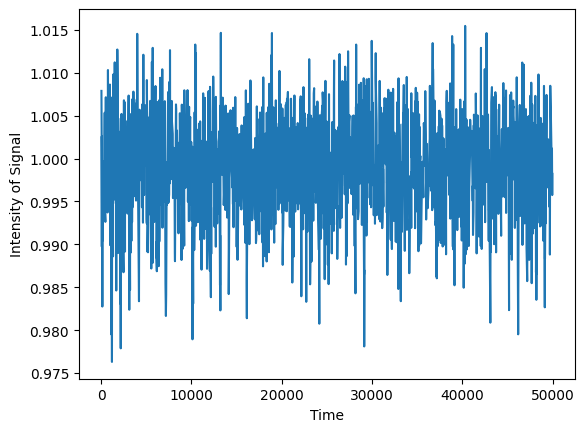

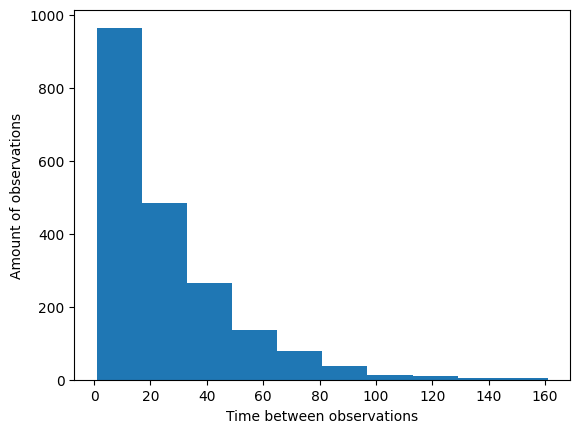

In [98]:
data=pd.read_csv('prob2.csv')

diff_list=[]
for i in range(1, len(data['time']+1)):
    diff_list.append(data.time[i] - data.time[i-1])

diff_list.sort()
print(diff_list[1000])

plt.figure()
plt.plot(data['time'],data['signal'])
plt.xlabel('Time')
plt.ylabel('Intensity of Signal')
plt.figure()
plt.hist(diff_list)
plt.xlabel('Time between observations')
plt.ylabel('Amount of observations')

Now we are gonna make the actual lombscargle periodogram to find the period of the exoplanets orbit. Looking at the graph and histogram above the minimum period we could detect would be 1, and the maximum period we could detect would be 50,000(because that is the length of the entire graph). We then convert this into angular frequency and use numpy's linespace function to get a large number of the possible angular frequencies between the max and min. We then plug time,signal and the possible angular frequencies into the lombscargle function. Note that precenter is True because the data is normalized. 

Angular Frequency = $\frac{2 \pi}{\text{period}}$

The lombscargle then returns the power at various freqencies, unfortunately this is not very useful for anything other than telling us the likelyhood of a certain period within data. So we plot the power returned against the angular frequencies plugged in to see the likely frequencies. Zooming in we see a spike from 0-0.1 and from 6.2-6.3. We can tell that the signals within 0-0.1 other than the one at 0.0063 are likely alising because of how they repeat a pattern and diminish. We know that the ones from 6.2-6.3 are unlikely to be a period because that would mean the planet is orbitting insanely fast and it is roughly 2pi away from the the first spike so it is likely an alias.

Now that we know the angular frequency of the exoplanet we can easily convert it into a period using the formula below. This gives us that the exoplanet has a period of 1000

Period = (2*pi)/(Angular Frequency)

1000.0098001940438


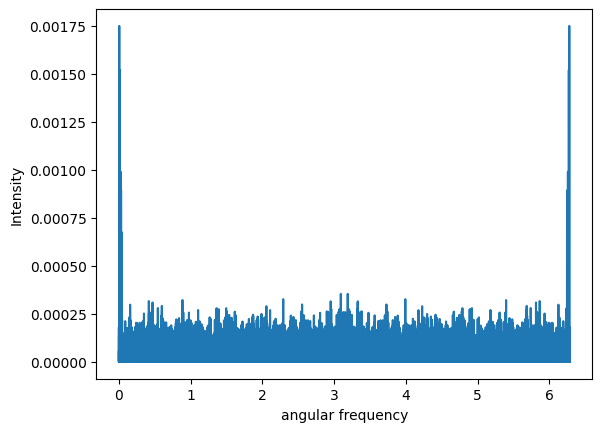

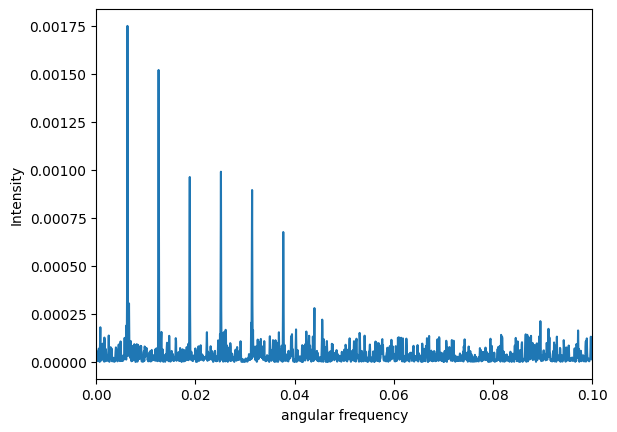

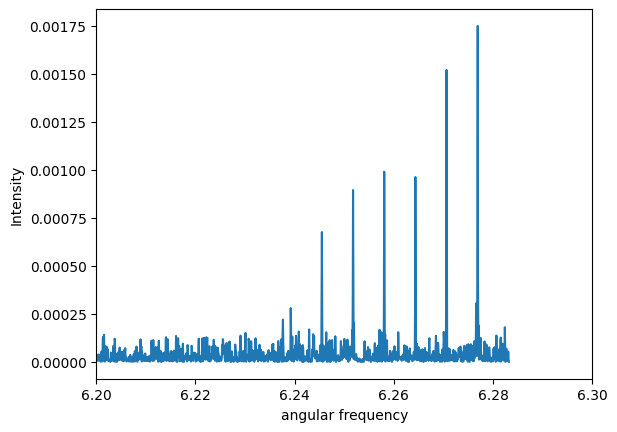

In [99]:
min_period=1
max_period=50000
afreq=2*np.pi*np.linspace(1/max_period,1/min_period,100000)

power=lombscargle(data['time'],data['signal'],afreq,precenter=True)
planet_afreq=afreq[np.argmax(power)]
plt.figure()
plt.plot(afreq,power)
plt.xlabel('angular frequency')
plt.ylabel('Intensity')
plt.figure()
plt.plot(afreq,power)
plt.xlabel('angular frequency')
plt.ylabel('Intensity')
plt.xlim(0,0.1)
plt.figure()
plt.plot(afreq,power)
plt.xlabel('angular frequency')
plt.ylabel('Intensity')
plt.xlim(6.2,6.3)
planet_period=(2*np.pi)/planet_afreq
print(planet_period)

This is a graph to see how well the estimated period from the lombscargle fits, with a guessed amplitude and phase.

(0.0, 4000.0)

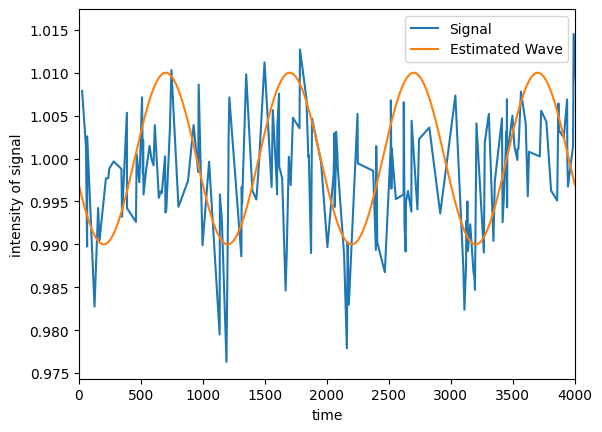

In [100]:
plt.plot(data['time'],data['signal'],'-',label='Signal')
plt.xlabel('time')
plt.ylabel('intensity of signal')
plt.legend()
x=np.linspace(0,4000,num=4000)
y=1+0.01*np.sin(2*np.pi*(x+550)/planet_period)
plt.plot(x,y,label='Estimated Wave')
plt.legend()
plt.xlim(0,4000)

This is the folded data meaning that it is looped around the period. This allows us to better see the amount that the exoplanet causes the brightness of the star to dimish. We then use a rolling average to better see the trends in the data 

0.9915456601549878

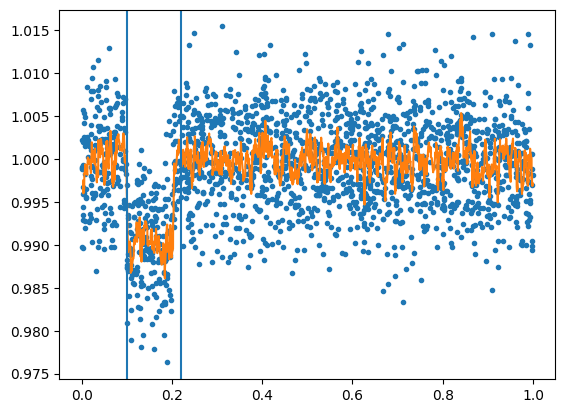

In [101]:
data['phase']=(data['time']%planet_period)/planet_period
plt.plot(data['phase'],data['signal'],'.')


data=data.sort_values('phase')
data['rolling']=data.signal.rolling(10).mean()

plt.plot(data['phase'],data['rolling'],'-')
plt.axvline(.1)
plt.axvline(0.22)
data['rolling'].loc[(data['phase']<0.22)&(data['phase']>0.1)].mean()